# Naive Bayes Classification
Name: Sebastian Firsaev 

Student ID: C00263348

Semester: two - 2024

Guide Notebook used: https://github.com/jakevdp/PythonDataScienceHandbook/blob/8a34a4f653bdbdc01415a94dc20d4e9b97438965/notebooks/05.05-Naive-Bayes.ipynb

# Deployment

IMDb Sentiment Analysis - Multinomial Naive Bayes has been deployed to Python Anywhere. Users can enter a moview review and the webapp will try to predict the sentiment of the review, it being either positive or negative. http://c00263348.pythonanywhere.com/

# Gaussian Naive Bayes for Synthetic Dataset Classification

This notebook aims to demonstrate the application of the Gaussian Naive Bayes algorithm on a synthetic dataset designed to challenge the classifier slightly more than a simple two-class problem.

### 1. Business Understanding
The focus of this notebook is to demonstrate the application of Gaussian Naive Bayes (GNB) for classifying synthetic data points into multiple groups based on their features. This task simulates real-world scenarios like classifying different types of objects or diagnosing diseases from various test results, where the features are continuous. By comparing GNB with Logistic Regression (LR), the notebook also aims to provide insights into the effectiveness of GNB under certain data distributions.

### 2. Data Understanding
The synthetic dataset is generated using make_classification from sklearn.datasets, designed with 500 samples, 2 features, no redundant features, 1 cluster per class, 3 classes, and a slight label noise. This dataset is intended to mimic real-world data with some degree of overlap between classes, making the classification task more challenging and realistic.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [34]:
# synthetic dataset
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_clusters_per_class=1, n_classes=3, flip_y=0.05, random_state=42)


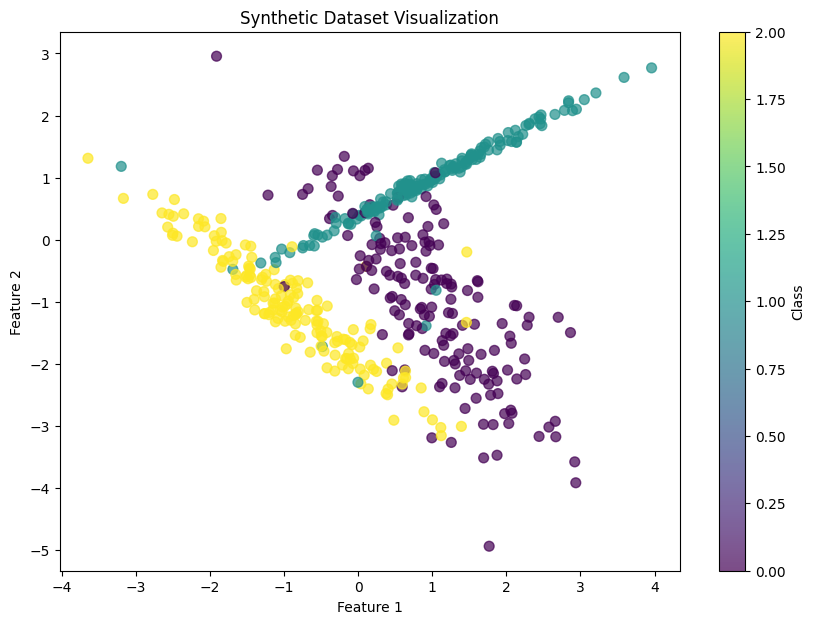

In [35]:
# Visualize the dataset
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.title('Synthetic Dataset Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.show()

### 3. Data Preparation
The dataset is split into training and testing sets, with 70% of the data used for training and the remaining 30% for testing. This split ensures that the model can be trained on a majority of the data while having a separate, unseen dataset for evaluation. No additional data cleaning or preprocessing is required since the data is synthetic and generated to be clean.

In [27]:
# training and testing sets split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Dataset shape: (500, 2)
Unique class labels: [0 1 2]


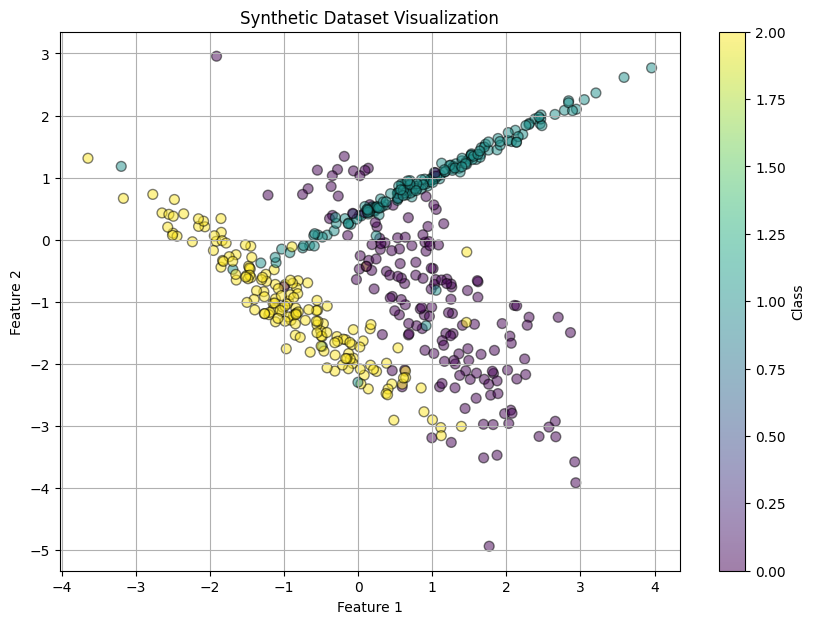

In [36]:
# Data Exploration and Visualization
print("Dataset shape:", X.shape)
print("Unique class labels:", np.unique(y))

plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, alpha=0.5, edgecolor='k')
plt.title('Synthetic Dataset Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()

### 4. Modeling
Two models are trained on the dataset:

- Gaussian Naive Bayes (GNB): Chosen for its simplicity and effectiveness in classifying data when the features are assumed to be normally distributed.
- Logistic Regression (LR): Used as a comparison to GNB, to understand the conditions under which GNB might perform better or worse than LR.

The models are trained using their default parameters with the exception of increasing the max_iter parameter for LR to ensure convergence.

In [28]:
# Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [37]:
# Logistic Regression model for comparison
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

### 5. Evaluation

The models are evaluated, the decision boundaries for GNB are visualized to assess how well the model can separate the classes in the feature space. 

In [39]:
# Predict on the testing set
pred = model.predict(X_test)
lr_pred = lr_model.predict(X_test)

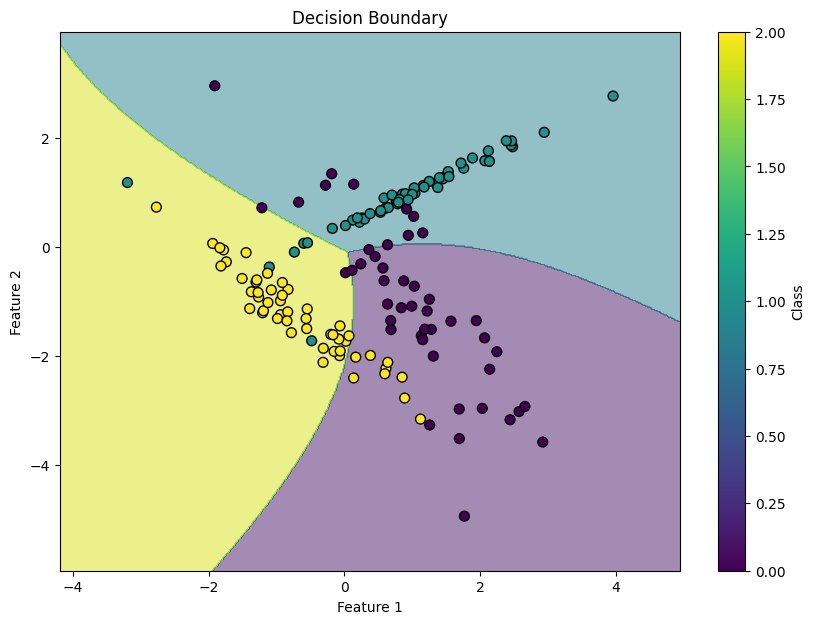

In [42]:
def plot_decision_boundaries(X, y, model):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10, 7))
    plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, edgecolor='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.colorbar(label='Class')

plot_decision_boundaries(X_test, y_test, model)


In [43]:
# plot decision boundaries
def plot_decision_boundaries(X, y, model, title='Decision Boundary'):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10, 7))
    plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, edgecolor='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.colorbar(label='Class')

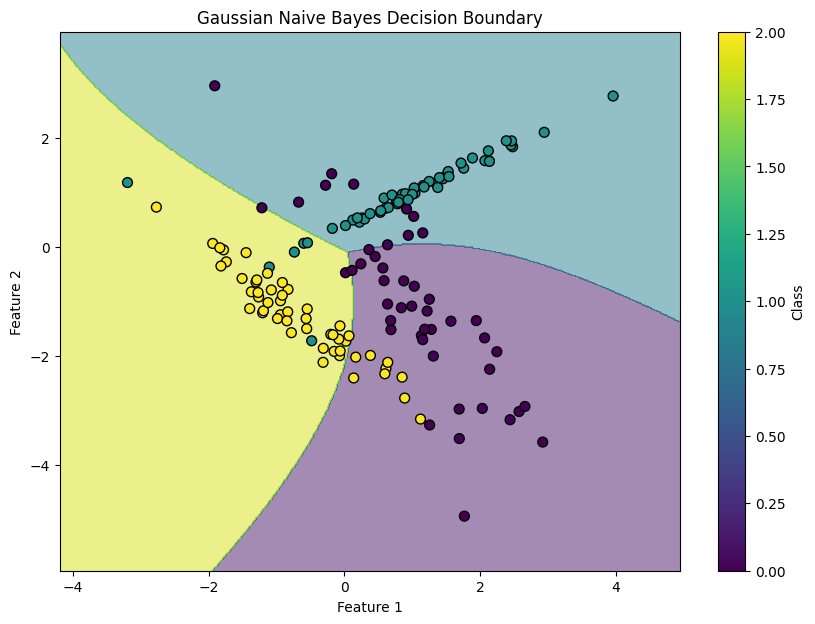

In [45]:
# Plot decision boundaries for Gaussian Naive Bayes
plot_decision_boundaries(X_test, y_test, model, 'Gaussian Naive Bayes Decision Boundary')

In [47]:
# probability estimates for the test set
y_prob = model.predict_proba(X_test)
print("Sample probability estimates:\n", y_prob[:5])

Sample probability estimates:
 [[1.20582323e-02 2.67441102e-03 9.85267357e-01]
 [9.84428812e-01 7.68335304e-06 1.55635043e-02]
 [8.91238069e-01 2.34538076e-02 8.53081233e-02]
 [6.70012996e-02 2.23528074e-02 9.10645893e-01]
 [1.40633396e-01 1.01986481e-02 8.49167956e-01]]


When one of the probabilities is close to 1 (or 100%), the model is very confident in its prediction. For example, in the first set of probabilities [1.20582323e-02, 2.67441102e-03, 9.85267357e-01], the model is highly confident that the data point belongs to the third class.

## IMDb Sentiment Analysis - Multinomial Naive Bayes

### 1. Business Understanding

The aim here is to analyze movie reviews from the IMDb dataset to classify them into positive or negative sentiments. This task will help understand overall public opinion on movies. Sentiment analysis of text data, such as movie reviews or types email, is a common application of machine learning in natural language processing.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [59]:

df = pd.read_csv('IMDB Dataset.csv')

### 2. Data Understanding

The dataset "IMDB Dataset.csv" consists of movie reviews in text format (review column) and their corresponding sentiments (sentiment column), labeled as either positive or negative. 

In [60]:
print("Sample reviews:\n", df.head())

Sample reviews:
                                               review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


### 3. Data Preparation

The sentiment labels are converted from textual ('positive', 'negative') to numerical format (1, 0) for processing by machine learning algorithms. The dataset is then split into training and testing sets, with 70% of the data used for training the model and 30% reserved for testing its performance.

In [61]:
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})


In [62]:
# Data Exploration
print("Dataset size:", len(df))
print("Sample reviews:\n", df.head())

Dataset size: 50000
Sample reviews:
                                               review  sentiment
0  One of the other reviewers has mentioned that ...          1
1  A wonderful little production. <br /><br />The...          1
2  I thought this was a wonderful way to spend ti...          1
3  Basically there's a family where a little boy ...          0
4  Petter Mattei's "Love in the Time of Money" is...          1


C:\Users\s3bas\AppData\Local\Temp\ipykernel_23676\3968577797.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='viridis')


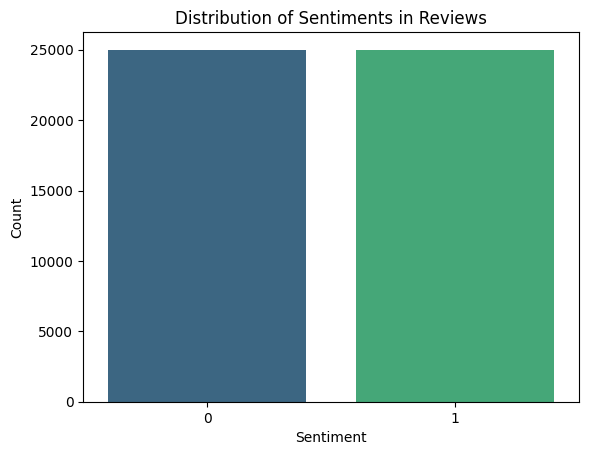

In [63]:
# Visualize the distribution of sentiments
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Distribution of Sentiments in Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

### 4. Modeling

A text processing and machine learning pipeline is established, featuring TfidfVectorizer for converting text data into a matrix of TF-IDF features and MultinomialNB (Multinomial Naive Bayes) for classification. Hyperparameter tuning is conducted via GridSearchCV to find the optimal parameters for the TF-IDF vectorizer and the Naive Bayes classifier, aiming to enhance the model's accuracy.

In [64]:
# Split dataset into features (X) and target variable (y)
X = df['review']
y = df['sentiment']

In [65]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [66]:
# Text preprocessing and model pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('nb', MultinomialNB()),
])

In [69]:
parameters = {
    'tfidf__max_features': (None, 5000),  
    'nb__alpha': (1e-2, 1),  
}

grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(stop_words='english')),
                                       ('nb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'nb__alpha': (0.01, 1),
                         'tfidf__max_features': (None, 5000)},
             verbose=1)

### 5. Evaluation

The model's performance is evaluated using accuracy, a confusion matrix, and a classification report, which provides precision, recall, and F1-scores for both classes (positive and negative). Additionally, cross-validation is performed to assess the model's stability and generalizability across different data splits.
- The best-performing model used a smoothing parameter (nb__alpha) of 1, which indicates that adding smoothing was beneficial for handling the presence of features not seen during training.
Not limiting the number of features (tfidf__max_features: None) extracted by TfidfVectorizer resulted in the highest model performance, suggesting the importance of utilizing the full vocabulary for sentiment classification.

- The model achieved a high accuracy of 0.863 on the test set, closely aligning with the cross-validation score obtained during the training phase. This indicates a strong predictive performance and generalizability of the model to unseen data.

- Precision and recall scores were well-balanced across both positive and negative classes, with slight variations. The model was slightly more reliable at identifying true negatives (higher recall for negative reviews) and slightly more precise with positive predictions (higher precision for positive reviews).
The balanced F1-scores (0.86 for both classes) further highlight the model's effectiveness in maintaining a good balance between precision and recall, which is crucial for applications where both types of errors are similarly costly.

- The cross-validation scores were consistent (0.865 +/- 0.008), indicating the model's stability and reliability across different subsets of the training data. The narrow confidence interval suggests low variance in the model's accuracy, affirming its robustness.

- The findings underscore the importance of comprehensive feature extraction in text classification tasks. Utilizing the full set of features available from the text data (without imposing a maximum feature count) contributed significantly to the model's performance.
The results also emphasize the value of hyperparameter tuning, particularly the smoothing parameter in Naive Bayes, for optimizing model performance.

These key findings demonstrate the effectiveness of the Multinomial Naive Bayes approach for sentiment analysis in natural language processing, especially when combined with thorough hyperparameter tuning and comprehensive feature extraction strategies. The model's high accuracy and balanced performance metrics suggest it is well-suited for classifying sentiments in movie reviews.

In [70]:
# Best parameters and score
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best score: 0.863
Best parameters set:
	nb__alpha: 1
	tfidf__max_features: None


In [71]:
# Model Evaluation
predictions = grid_search.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))


Accuracy: 0.863

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86      7411
           1       0.88      0.85      0.86      7589

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000



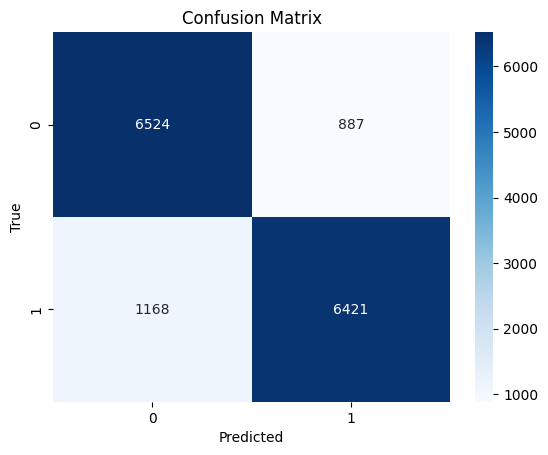

In [72]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [73]:
# Cross-validation to check model stability
cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5)
print("Cross-validation scores: %0.3f (+/- %0.3f)" % (cv_scores.mean(), cv_scores.std() * 2))

Cross-validation scores: 0.865 (+/- 0.008)
